## 536 HW2 Runfeng Xu (rx43)

###  Part1 Generating Decision Trees

<span style="color:#0366d6">(1) For a given value of k, m, (number of features, number of data points), write a function to generate a training data set based on the above scheme</span>

In [42]:
import random

def generate_dataset(k,m):
    # happend = set()
    dataset = []
    for _ in range(m):
    # while(len(happend)<m):
        x1 = 1 if random.random()>=0.5 else 0
        X = [x1]
        weighted_average = 0
        const1 = sum([0.9**i for i in range(2,k+1)])
        for i in range(1,k):
            X.append(X[-1] if random.random()<=0.75 else 1-X[-1])
            weighted_average += 0.9**(i+1)/const1*X[-1]*X[-1]
        # if tuple(X) not in happend:
        # 	happend.add(tuple(X))
        Y = X[0] if weighted_average>=0.5 else 1-X[0]
        dataset.append((X,Y))
    return dataset

<span style="color:#0366d6">(2) Given a data set, write a function to fit a decision tree to that data based on splitting the variables by maximizing the information gain (ID3). </span>

In [43]:
from math import log2 as log

class Node(object):
    def __init__(self,node_idx=None,zero = None,one = None):
        self.idx = node_idx
        self.zero = zero
        self.one = one
        self.result = None
        self.visited = set()


class Decision_Tree(object):
    def __init__(self):
        self.root = Node()

    def calculate_HY(self,subset):
        P_Y=[0,0]
        for x,y in subset:
            P_Y[y]+=1
        P_Y[0],P_Y[1] = P_Y[0]/(P_Y[0]+P_Y[1]),P_Y[1]/(P_Y[0]+P_Y[1])  # Convert Freq to Probability
        H_Y = 0
        if P_Y[0]:
            H_Y -= P_Y[0]*log(P_Y[0])
        if P_Y[1]:
            H_Y -= P_Y[1]*log(P_Y[1])

        return H_Y 

    def calculate_DI(self,subset,X_idx):

        P_X = [0,0]  # count X freq

        P_X_Y = [[0,0],[0,0]]   # count X,Y freq

        for x,y in subset:
            P_X[x[X_idx]]+=1
            P_X_Y[x[X_idx]][y]+=1

        if P_X[0]:
            P_X_Y[0][0],P_X_Y[0][1] = P_X_Y[0][0]/P_X[0],P_X_Y[0][1]/P_X[0]
        else:
            P_X_Y[0][0] = P_X_Y[0][1]=0
        if P_X[1]:	
            P_X_Y[1][0],P_X_Y[1][1] = P_X_Y[1][0]/P_X[1],P_X_Y[1][1]/P_X[1]
        else:
            P_X_Y[1][0]=P_X_Y[1][1]=0

        P_X[0],P_X[1] = P_X[0]/(P_X[0]+P_X[1]),P_X[1]/(P_X[0]+P_X[1])

        HY_X0 = HY_X1 = 0

        if P_X_Y[0][0]:
            HY_X0 -= P_X_Y[0][0]*log(P_X_Y[0][0])
        if P_X_Y[0][1]:
            HY_X0 -= P_X_Y[0][1]*log(P_X_Y[0][1])

        if P_X_Y[1][0]:
            HY_X1 -= P_X_Y[1][0]*log(P_X_Y[1][0])
        if P_X_Y[1][1]:
            HY_X1 -= P_X_Y[1][1]*log(P_X_Y[1][1])


        HY_X = P_X[0]*HY_X0+P_X[1]*HY_X1

        return HY_X


    def calculate_IG(self,subset,visited):


        hy = self.calculate_HY(subset)
        
        candidate = 0
        maxx = 0
        for i in range(self.k):
            if i not in visited:
                hy_x = self.calculate_DI(subset,i)
                
                IG = hy-hy_x

                if IG>maxx:
                    maxx,candidate = IG,i
 
        return candidate

    def build_ID3(self,dataset):
        self.m,self.k = len(dataset),len(dataset[0][0])

        self.step(dataset,self.root)


    def step(self,subset,node):
        if len(set([y for x,y in subset]))<2:
            node.result = subset[0][1]
        else:
            split_idx = self.calculate_IG(subset,node.visited)
            node.idx = split_idx
            node.visited.add(split_idx)
            zero,one = [],[]
            for x,y in subset:

                if x[split_idx]==0:
                    zero.append([x,y])
                else:
                    one.append([x,y])
    
            if len(zero):
                node.zero = Node()

                node.zero.visited = node.visited.copy()
                self.step(zero,node.zero)
            if len(one):
                node.one = Node()

                node.one.visited = node.visited.copy()
                self.step(one,node.one)


    def predict(self,X):
        node = self.root
        while(node.result is None):
            idx = node.idx

            if X[idx]==0:
                node = node.zero
            else:
                node = node.one
        return node.result

<span style="color:#0366d6">(3) For k = 4 and m = 30, generate data and fit a decision tree to it. Does the ordering of the variables in the decision tree make sense, based on the function that defines Y ? Why or why not? Draw the tree.</span>


- Answer: the ordering do make sense, tje result kind of reflects the fact that the Y is heavily correlated to the first element X0,

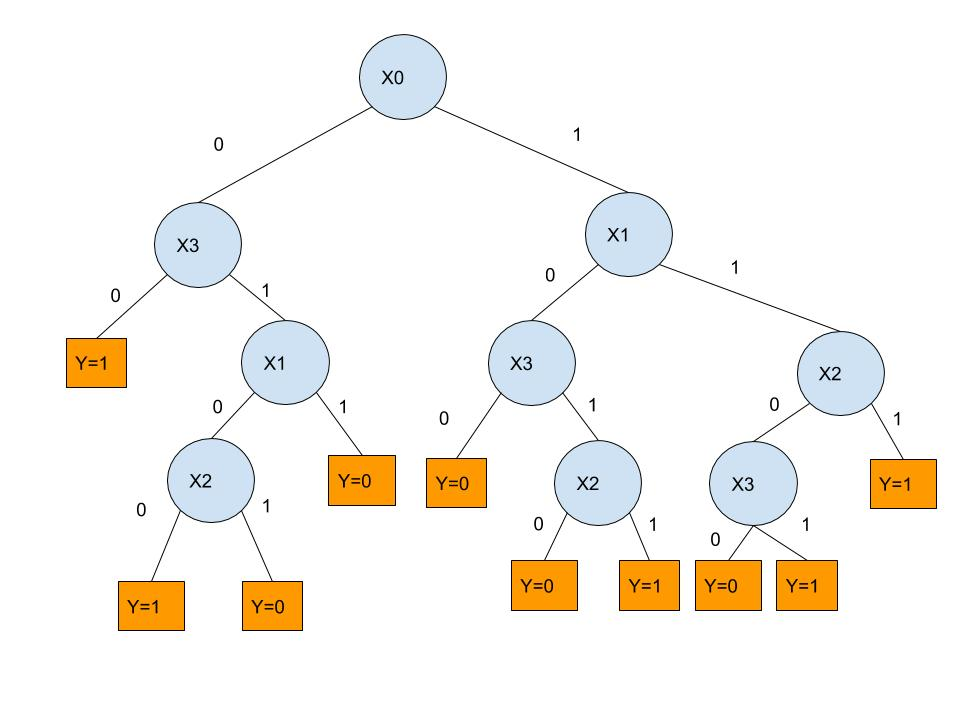

<span style="color:#0366d6"> (4) Write a function that takes a decision tree and estimates its typical error on the underlying distribution err( ˆf);
i.e., generate a lot of data according to the above scheme, and find the average error rate of this tree over that
data.   </span>

In [44]:
def main():
    k,m = 10,50
    dataset  = generate_dataset(k,m)
    decision = Decision_Tree()
    decision.build_ID3(dataset)
    print('finish building')
    new_dataset = generate_dataset(k,1000)
    wrong = 0
    for j in range(1000):
        prediction = decision.predict(new_dataset[j][0])
        if prediction!=new_dataset[j][1]:
            wrong+=1
    print('error rate = ',wrong/1000*100,'%')

main()

finish building
error rate =  21.099999999999998 %


<span style="color:#0366d6">(5) For k = 10, estimate the value of |errtrain(
ˆf) − err( ˆf)| for a given m by repeatedly generating data sets, fitting
trees to those data sets, and estimating the true and training error. Do this for multiple m, and graph this
difference as a function of m. What can you say about the marginal value of additional training data? </span>

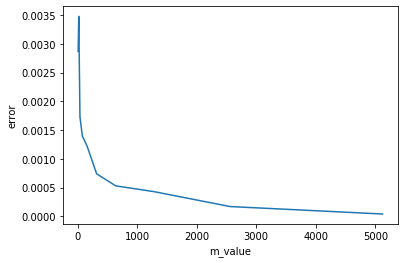

In [50]:
def for_m_equal(m):
    k,m = 10,m
    dataset  = generate_dataset(k,m)
    decision = Decision_Tree()
    decision.build_ID3(dataset)
#     print('finish building')
    new_dataset = generate_dataset(k,100000)
    wrong = 0
    for j in range(1000):
        prediction = decision.predict(new_dataset[j][0])
        if prediction!=new_dataset[j][1]:
            wrong+=1
    return wrong/100000

def main():
    m_s = [10,20,40,80,160,320,640,1280,2560,5120]
    errors = []
    for m in m_s:
        errors.append(for_m_equal(m))
    import matplotlib.pyplot as plt 
    plt.plot(m_s,errors)
    plt.xlabel('m_value') 
    plt.ylabel('error') 
main()

<span style="color:#0366d6">(6) Design an alternative metric for splitting the data, not based on information content / information gain. Repeat
the computation from (5) above for your metric, and compare the performance of your trees vs the ID3 trees</span>

The idea I have a the new metric is to determine the correlation between a certain X_i to Y, and the correlation can be either positive correlation(X_i = 0 -> Y = 0 ,X_i = 1 -> Y=1), or negative correlation(X_i = 1 -> Y = 0 ,X_i = 0 -> Y=1). Since the X_i and Y only have 0,1 as the candidate values. If X_i and Y are completely uncorrelated, then the Expection of $ \lvert{X_i-Y}\lvert $ will be **0.5**. When X-i and Y are correlated, the Expection of $ \lvert{X_i-Y}\lvert $ will be either 0 or 1, both fade away from 0.5. Then we can compute the average of $ \lvert{X_i-Y}\lvert $ for all data in the dataset for all i and pick the index whose result is furthest from 0.5, we consider that X_i has the strongest correlation with Y.

In [51]:
class Metrics_Tree(Decision_Tree):
    def __init__(self):
        Decision_Tree.__init__(self)
    def average_correlation(self,subset,i):
        count = 0
        summ_correlation = 0
        for x,y in subset:
            summ_correlation+=abs(y-x[i])
            count+=1
        return summ_correlation/count
    def calculate_IG(self,subset,visited):
        candidate = 0
        maxx = 0
        for i in range(self.k):
            if i not in visited and len(set([x[i] for x,y in subset]))>1:
                correlation = self.average_correlation(subset,i)
                if abs(correlation-0.5)>=maxx:
                    maxx,candidate = abs(correlation-0.5),i
        return candidate

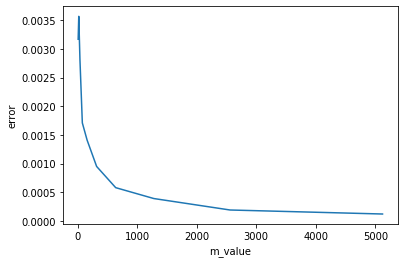

In [52]:
def for_m_equal(m):
    k,m = 10,m
    dataset  = generate_dataset(k,m)
    decision = Metrics_Tree()
    decision.build_ID3(dataset)

    new_dataset = generate_dataset(k,100000)
    wrong = 0
    for j in range(1000):
        prediction = decision.predict(new_dataset[j][0])
        if prediction!=new_dataset[j][1]:
            wrong+=1
    return wrong/100000

def main():
    m_s = [10,20,40,80,160,320,640,1280,2560,5120]
    errors = []
    for m in m_s:
        errors.append(for_m_equal(m))
    import matplotlib.pyplot as plt 
    plt.plot(m_s,errors)
    plt.xlabel('m_value') 
    plt.ylabel('error') 
main()

### Part2 Pruning Decision Tree


<span style="color:#0366d6">(1) Write a function to generate m samples of (X, Y ), and another to fit a tree to that data using ID3. Write a
third function to, given a decision tree f, estimate the error rate of that decision tree on the underlying data,
err(f). Do this repeatedly for a range of m values, and plot the ‘typical’ error of a tree trained on m data
points as a function of m. Does this agree with your intuition? </span>

In [3]:
def generate_dataset2(m):
    dataset = []
    for _ in range(m):
        x1 = 1 if random.random()>=0.5 else 0
        X = [x1]
        for i in range(1,15):
            X.append(X[-1] if random.random()<=0.75 else 1-X[-1])
        for i in range(15,21):
            X.append(1 if random.random()<=0.5 else 0)
        Y = max(set(X[1:8]),key = X[1:8].count) if X[0]==0 else max(set(X[8:15]),key = X[8:15].count)
        dataset.append((X,Y))

    return dataset


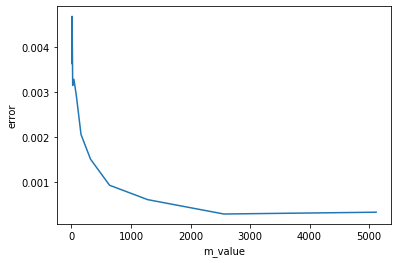

In [50]:
def for_m_equal(m):
    m = m
    dataset  = generate_dataset2(m)
    decision = Decision_Tree()
    decision.build_ID3(dataset)
#     print('finish building')
    new_dataset = generate_dataset2(100000)
    wrong = 0
    for j in range(1000):
        prediction = decision.predict(new_dataset[j][0])
        if prediction!=new_dataset[j][1]:
            wrong+=1
    return wrong/100000

def main():
    m_s = [5,10,20,40,80,160,320,640,1280,2560,5120]
    errors = []
    for m in m_s:
        errors.append(for_m_equal(m))
    import matplotlib.pyplot as plt 
    plt.plot(m_s,errors)
    plt.xlabel('m_value') 
    plt.ylabel('error') 
main()

The result agrees with my intuition, with m increase, the error rate will decrease exponentially.


<span style="color:#0366d6">(2) Note that X15 through X20 are completely irrelevant to predicting the value of Y . For a range of m values,
repeatedly generate data sets of that size and fit trees to that data, and estimate the average number of
irrelevant variables that are included in the fit tree. How much data would you need, typically, to avoid fitting
on this noise? </span>

In [4]:
class New_Decision_Tree(Decision_Tree):
    def __init__(self):
        Decision_Tree.__init__(self)
    def count_split_node(self):
        s = set()
        nodes = [self.root]
        while(nodes):
            for _ in range(len(nodes)):
                node = nodes.pop(0)
                if node.idx!=None:
                    s.add(node.idx)
                    nodes.append(node.zero)
                    nodes.append(node.one)
        return s

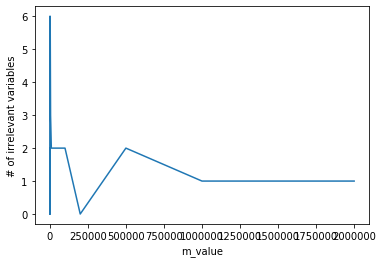

In [39]:
def for_m_equal(m):
    dataset  = generate_dataset2(m)
    decision = New_Decision_Tree()
    decision.build_ID3(dataset)
#     print('finish building')
    return decision.count_split_node()
    
def main():
    m_s = [5,10,20,40,80,160,320,640,1280,2560,5120,10000,50000,100000,200000,500000,1000000,2000000]
    splits = []
    for m in m_s:
        splits.append(for_m_equal(m))
#     for ele in splits:
#         print(ele)
    for i in range(len(splits)):
        count = 0
        for ele in splits[i]:
            if 15<=ele<=20:
                count+=1
        splits[i]=count
    import matplotlib.pyplot as plt 
    plt.plot(m_s,splits)
    plt.xlabel('m_value') 
    plt.ylabel('# of irrelevant variables') 
main()

from the experiments, I believe we need m>=1000000 to eliminate noise variable in the ID3 decision Tree.

<span style="color:#0366d6">(3) Generate a data set of size m = 10000, and set aside 8000 points for training, and 2000 points for testing. The
remaining questions should all be applied to this data set.</span>

In [5]:
dataset  = generate_dataset2(10000)
training = dataset[:8000]
testing = dataset[8000:]

- <span style="color:#0366d6">(a) Pruning by Depth: Consider growing a tree as a process - running ID3 for instance until all splits up to depth d have been performed. Depth d = 0 should correspond to no decisions - a prediction for Y is made just on the raw frequencies of Y in the data. Plot, as a function of d, the error on the training set and the error on the test set for a tree grown to depth d. What does your data suggest as a good threshold depth?</span>

In [27]:
class Prun_By_Depth_Tree(New_Decision_Tree):
    def __init__(self,d):
        Decision_Tree.__init__(self)
        self.max_depth = d
    def step(self,subset,node):
        if len(set([y for x,y in subset]))<2 or len(node.visited)>=self.max_depth:
            Y = [y for x,y in subset]
            node.result = max(set(Y),key = Y.count)
        else:
            split_idx = self.calculate_IG(subset,node.visited)
            node.idx = split_idx
            node.visited.add(split_idx)
            zero,one = [],[]
            for x,y in subset:

                if x[split_idx]==0:
                    zero.append([x,y])
                else:
                    one.append([x,y])
    
            if len(zero):
                node.zero = Node()

                node.zero.visited = node.visited.copy()
                self.step(zero,node.zero)
            if len(one):
                node.one = Node()

                node.one.visited = node.visited.copy()
                self.step(one,node.one)
    

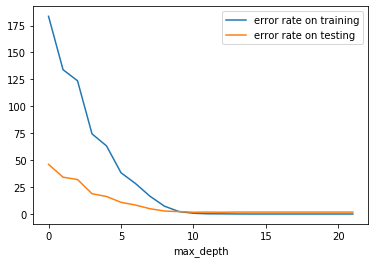

In [21]:
def main():
    errors_on_training = []
    errors_on_testing = []
    for d in range(0,22):
        decision = Prun_By_Depth_Tree(d)
        decision.build_ID3(training)
        count=0
        for data in training:
            if decision.predict(data[0])!=data[1]:
                count+=1
        errors_on_training.append(count/2000*100)
        count=0
        for data in testing:
            if decision.predict(data[0])!=data[1]:
                count+=1
        errors_on_testing.append(count/2000*100)
    import matplotlib.pyplot as plt 
    plt.plot([d for d in range(0,22)],errors_on_training,label = "error rate on training")
    plt.plot([d for d in range(0,22)],errors_on_testing,label = "error rate on testing")
    plt.xlabel('max_depth')  
    plt.legend()
main()

As we can see from the result, after max_depth is great than 10, the accuracy on testing dataset isn't improved much further, therefore a reasonable threshold depth value could be *10*

<span style="color:#0366d6">(b) Pruning by Sample Size: The less data a split is performed on, the less ‘accurate’ we expect the
result of that split to be. Let s be a threshold such that if the data available at a node in your decision
tree is less than or equal to s, you do not split and instead decide Y by simple majority vote (ties broken
by coin flip). Plot, as a function of s, the error on the training set and the error on the testing set for a
tree split down to sample size s. What does your data suggest as a good sample size threshold?</span>

In [28]:
class Prun_By_Sample_Size_Tree(New_Decision_Tree):
    def __init__(self,s):
        Decision_Tree.__init__(self)
        self.min_sample_size = s
    def step(self,subset,node):
        if len(set([y for x,y in subset]))<2 or len(subset)<=self.min_sample_size:
            Y = [y for x,y in subset]
            node.result = max(set(Y),key = Y.count)
        else:
            split_idx = self.calculate_IG(subset,node.visited)
            node.idx = split_idx
            node.visited.add(split_idx)
            zero,one = [],[]
            for x,y in subset:

                if x[split_idx]==0:
                    zero.append([x,y])
                else:
                    one.append([x,y])
    
            if len(zero):
                node.zero = Node()

                node.zero.visited = node.visited.copy()
                self.step(zero,node.zero)
            if len(one):
                node.one = Node()

                node.one.visited = node.visited.copy()
                self.step(one,node.one)
    

[46.1, 34.2, 32.0, 32.0, 18.85, 17.9, 17.9, 16.25, 10.05, 8.55, 7.9, 6.9, 5.1, 3.15, 1.95, 1.8499999999999999, 2.0, 1.7999999999999998, 1.7999999999999998]


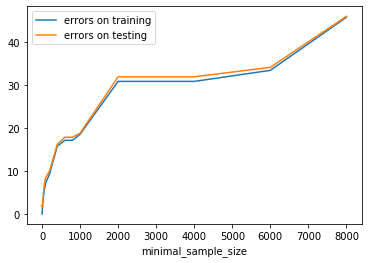

In [32]:
def main():
    errors_on_training = []
    errors_on_testing = []
    for s in [8000,6000,4000,2000,1000,800,600,400,200,100,80,60,40,20,10,8,6,4,1]:
        decision = Prun_By_Sample_Size_Tree(s)
        decision.build_ID3(training)
        count=0
        for data in training:
            if decision.predict(data[0])!=data[1]:
                count+=1
        errors_on_training.append(count/8000*100)
        count=0
        for data in testing:
            if decision.predict(data[0])!=data[1]:
                count+=1
        errors_on_testing.append(count/2000*100)
    import matplotlib.pyplot as plt 
    plt.plot([8000,6000,4000,2000,1000,800,600,400,200,100,80,60,40,20,10,8,6,4,1],errors_on_training,label = "errors on training")
    plt.plot([8000,6000,4000,2000,1000,800,600,400,200,100,80,60,40,20,10,8,6,4,1],errors_on_testing,label = "errors on testing")
    plt.xlabel('minimal_sample_size') 
    plt.legend()
main()

From the Result, I think **10** could be a fair threshold for sample_size in the decision tree to decide whether to further split or not.

<span style="color:#0366d6">(5) Repeat the computation of Problem 2, growing your trees only to depth d as chosen in 3.a. How does this
change the likelihood or frequency of including spurious variables in your trees?
</span>
<br>
<span style="color:#0366d6">
6) Repeat the computation of Problem 2, splitting your trees only to sample size s as chosen in 3.b. How does
this change the likelihood or frequency of including spurious variables in your trees?</span>

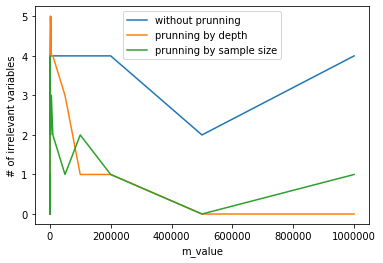

In [36]:
def for_m_equal(m):
    dataset  = generate_dataset2(m)
    decision1 = New_Decision_Tree()
    decision2 = Prun_By_Depth_Tree(10)
    decision3 = Prun_By_Sample_Size_Tree(10)
    decision1.build_ID3(dataset)
    decision2.build_ID3(dataset)
    decision3.build_ID3(dataset)
#     print('finish building')
    return [decision1.count_split_node(),decision2.count_split_node(),decision3.count_split_node()]
    
def main():
    m_s = [5,10,20,40,80,160,320,640,1280,2560,5120,10000,50000,100000,200000,500000,1000000]
    splits_1 = []
    splits_2 = []
    splits_3 = []
    for m in m_s:
        result1,result2,result3 = for_m_equal(m)
        splits_1.append(result1)
        splits_2.append(result2)
        splits_3.append(result3)
    for i in range(len(splits_1)):
        count = 0
        for ele in splits_1[i]:
            if 15<=ele<=20:
                count+=1
        splits_1[i]=count
    for i in range(len(splits_2)):
        count = 0
        for ele in splits_2[i]:
            if 15<=ele<=20:
                count+=1
        splits_2[i]=count
    for i in range(len(splits_3)):
        count = 0
        for ele in splits_3[i]:
            if 15<=ele<=20:
                count+=1
        splits_3[i]=count
    import matplotlib.pyplot as plt 
    plt.plot(m_s,splits_1,label = "without prunning")
    plt.plot(m_s,splits_2,label = "prunning by depth")
    plt.plot(m_s,splits_3,label = "prunning by sample size")
    
    plt.xlabel('m_value') 
    plt.ylabel('# of irrelevant variables') 
    plt.legend()
main()

According to the result, both prunning by depth and prunning by sample size have a positive impact on reducing noise variables, and prunning by depth has a better result than prunning by sample size.